In [3]:
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd


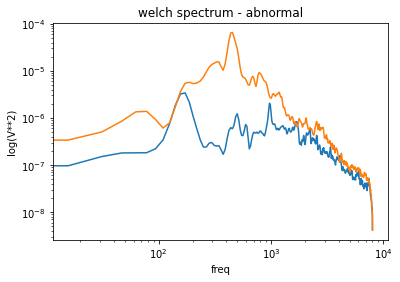

In [62]:



fe_psd_n = feature_extractor_welchPSD(BASE_FOLDER,'normal')
fe_psd_n.set_hyperparamter(nperseg=512, nfft=1024,channel=2)
fe_psd_a = feature_extractor_welchPSD(BASE_FOLDER,'abnormal')
fe_psd_a.set_hyperparamter(nperseg=512, nfft=1024,channel=2)
fe_psd_n.create_from_wav(r'\dataset\6dB\pump\id_00\normal\00000004.wav')
fe_psd_a.create_from_wav(r'\dataset\6dB\pump\id_00\abnormal\00000015.wav')
fe_psd_n.plot()
fe_psd_a.plot()

# Metric check

## RMS

In [63]:
def rms(s):
    rms = np.sqrt(np.mean(np.square(s)))
    return rms

print(rms(fe_psd_n.feature_data['Pxx']))
print(rms(fe_psd_a.feature_data['Pxx']))

4.1505677e-07
6.180419e-06


## Std

In [64]:
print(np.std(fe_psd_n.feature_data['Pxx']))
print(np.std(fe_psd_a.feature_data['Pxx']))

3.3853465e-07
5.9443714e-06


## Pearson correlation

In [65]:
print(scipy.stats.pearsonr(fe_psd_n.feature_data['Pxx'], fe_psd_a.feature_data['Pxx'])[0])


0.2974038681761312


## scroll

In [30]:
%run -i ..\..\utility\CleanAextract_to_PandasPickles.py

In [54]:
fn, fa = get_wave_files(BASE_FOLDER,{'SNR': '6dB',
                            'machine': 'pump', 
                            'ID': ['00']}, 100)

#fn

{'00': ['A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000000.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000001.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000002.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000003.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000004.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000005.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000006.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000007.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000008.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000009.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\00000010.wav',
  'A:\\Dev\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\pump\\id_00\\normal\\0

In [32]:
fe_psd_base = feature_extractor_welchPSD(BASE_FOLDER,'normal')
fe_psd_base.set_hyperparamter(nperseg=512, nfft=1024,channel=2)
fe_psd_base.create_from_wav(r'\dataset\6dB\pump\id_00\normal\00000004.wav')

In [55]:
df = pd.DataFrame()
fe_psd_run = feature_extractor_welchPSD(BASE_FOLDER,'runner')
fe_psd_run.set_hyperparamter(nperseg=512, nfft=1024,channel=2)
crms = rms(fe_psd_base.feature_data['Pxx'])
cstd = np.std(fe_psd_base.feature_data['Pxx'])
cmean = np.mean(fe_psd_base.feature_data['Pxx'])
def at_to_df(df,fn,a):
    for f in fn:
        fe_psd_run.create_from_wav(f)
        df.at[f,'a'] = a
        df.at[f,'rms'] = rms(fe_psd_run.feature_data['Pxx'])-crms
        df.at[f,'crms'] = rms(fe_psd_run.feature_data['Pxx'])
        df.at[f,'std'] = np.std((fe_psd_run.feature_data['Pxx']))
        df.at[f,'cstd'] = np.std((fe_psd_run.feature_data['Pxx'])) - cstd
        df.at[f,'mean'] = np.mean((fe_psd_run.feature_data['Pxx']))
        df.at[f,'cmean'] = np.mean((fe_psd_run.feature_data['Pxx'])) - cmean
        df.at[f,'corr'] = \
        scipy.stats.pearsonr(fe_psd_base.feature_data['Pxx'], fe_psd_run.feature_data['Pxx'])[0]
    
at_to_df(df,fn['00'],0)
at_to_df(df,fa['00'],1)

In [56]:
g = df.groupby('a')
g.mean()

,rms,crms,std,cstd,mean,cmean,corr
a,,,,,,,
0.0,1.182869e-08,4.268855e-07,3.398743e-07,1.339605e-09,2.579741e-07,1.783574e-08,0.874915
1.0,2.702313e-06,3.117370e-06,2.927955e-06,2.589420e-06,1.041628e-06,8.014894e-07,0.445417


In [58]:
g['cmean'].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
0.0,100.0,1.783574e-08,1.376326e-08,-8.911300e-09,6.732577e-09,1.735803e-08,2.715851e-08,5.454865e-08
1.0,100.0,8.014894e-07,4.733828e-07,-1.247833e-07,4.890454e-07,8.686610e-07,1.213389e-06,1.563721e-06


In [59]:
g['crms'].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
0.0,100.0,4.268855e-07,2.419384e-08,3.633285e-07,4.107129e-07,4.245672e-07,4.403852e-07,4.896681e-07
1.0,100.0,3.117370e-06,1.845114e-06,3.413415e-07,1.577098e-06,3.193872e-06,4.359647e-06,7.218765e-06


In [60]:
g['corr'].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
0.0,100.0,0.874915,0.042519,0.739820,0.852370,0.883872,0.899303,1.000000
1.0,100.0,0.445417,0.162520,0.217145,0.319241,0.400597,0.555135,0.879132


In [61]:
g['cstd'].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
0.0,100.0,1.339605e-09,2.374102e-08,-7.224077e-08,-1.301945e-08,-1.589441e-09,1.457862e-08,6.528484e-08
1.0,100.0,2.589420e-06,1.800292e-06,-1.727580e-08,1.057553e-06,2.615060e-06,3.793965e-06,6.683856e-06
